#### What is Customer Lifetime Value (CLV)?
Customer Lifetime Value (CLV or CLTV) is the average revenue you can generate from customers over the entire lifetime of their account. In simple terms, it is the money you would make from a customer before churning.

#### Why is CLV Important to Know?
CLV is an important metric because it provides you with a customer-centric perspective to guide some critical marketing and sales strategies of your subscription business, such as acquisition, retention, cross-selling, upselling, and support.
It helps you decide how much to spend on acquisition

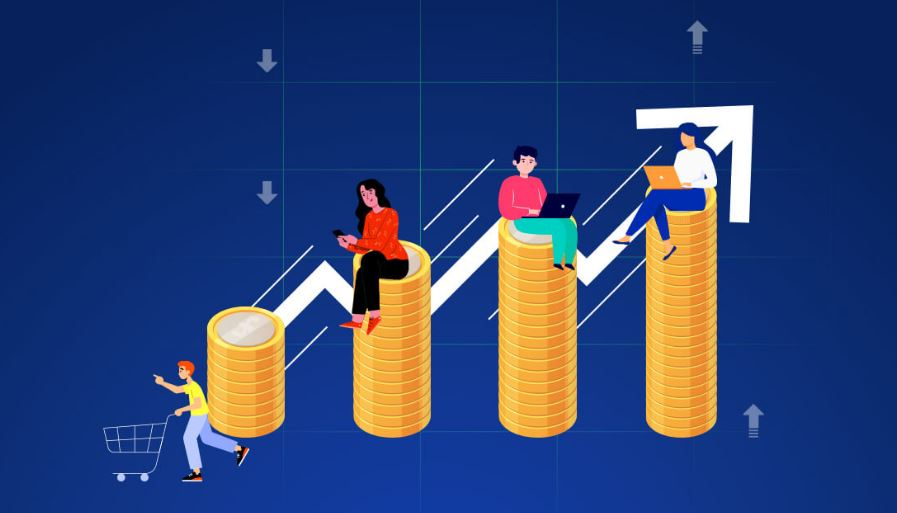

In [72]:
from IPython.display import Image
Image(filename='image_cltv.JPG')

#### Here we will start by analysing one dataset and get the insights from the data

### Importing Packages

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

### Importing Dataset

In [14]:
df = pd.read_csv('customer_acquisition_data.csv') 
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [15]:
## getting the details of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [18]:
## Checking Cardinality of Channel variable

print(df.channel.unique())

['referral' 'paid advertising' 'email marketing' 'social media']


#### Now we will do some EDA on our dataset like we will calculate Channel wise average cost, average conversion_rate and total revenue. This will help us in identifying which channel is being effective and will be a crucial point in deciding for further course of actions

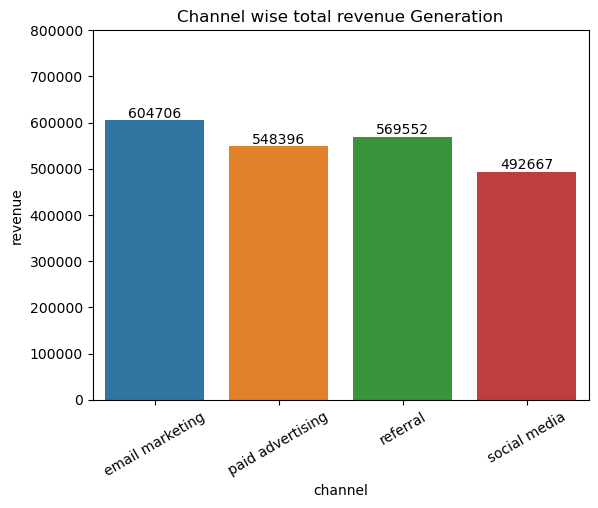

In [31]:
## Analysing Total revenue generation based on Channel


channel_rev_summ = df.groupby('channel', as_index=False)['revenue'].sum()
fig = sns.barplot(data=channel_rev_summ, x = 'channel', y = 'revenue')
for i in fig.containers:
    plt.bar_label(i)
plt.title('Channel wise total revenue Generation')
plt.xticks(rotation = 30)
plt.ylim((0,800000))
plt.show()

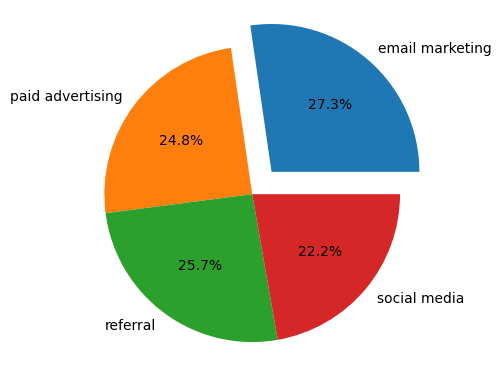

In [62]:
plt.pie(x = channel_rev_summ.revenue  , labels= channel_rev_summ.channel, autopct= '%1.1f%%', explode = [0.2,0,0,0] )
plt.show()

* **We can see from above graph that highest Revenue generation is through email marketing followed by paid advertising**

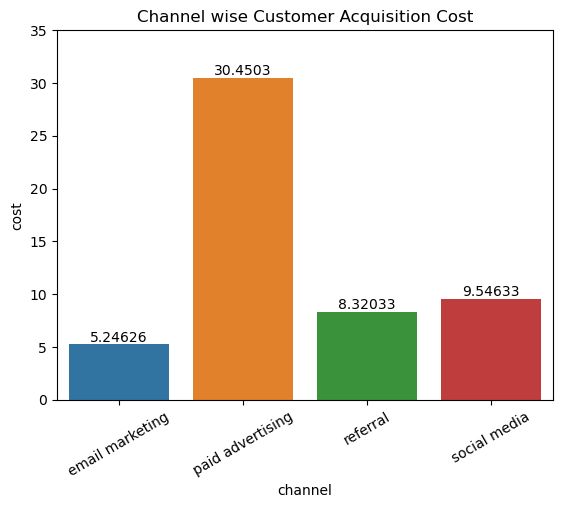

In [38]:
## Analysing Customer Acquisition Cost based on Channel


channel_cost_summ = df.groupby('channel', as_index=False)['cost'].mean()
fig = sns.barplot(data=channel_cost_summ, x = 'channel', y = 'cost')
for i in fig.containers:
    plt.bar_label(i)
plt.title('Channel wise Customer Acquisition Cost')
plt.xticks(rotation = 30)
plt.ylim((0,35))
plt.show()

* **We can see from above graph that paid advertising is the channel which is having maximum average cost and least cost is associated with email marketing**

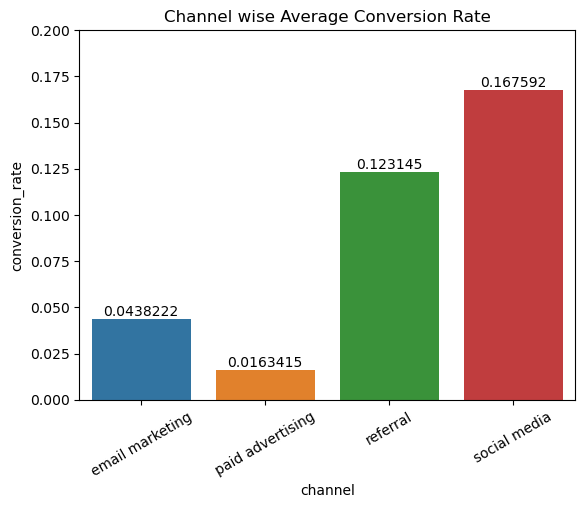

In [37]:
## Analysing Average conversion_rate based on Channel


channel_conversion_summ = df.groupby('channel', as_index=False)['conversion_rate'].mean()
fig = sns.barplot(data=channel_conversion_summ, x = 'channel', y = 'conversion_rate')
for i in fig.containers:
    plt.bar_label(i)
plt.title('Channel wise Average Conversion Rate')
plt.xticks(rotation = 30)
plt.ylim((0,0.2))
plt.show()

* **We can see from above graph that paid advertising is the channel which is having least conversion rate and  and social media is having maximum conversion rate**

### Now let’s calculate the return on investment (ROI) for each channel:

##### ROI is major criteria for checking the effectiveness of investment to any domain of business

In [64]:
## first we will add one new variable ROI in our df

df['ROI'] = df['revenue']/df['cost']
df

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,504.667681
1,2,paid advertising,30.450327,0.016341,3410,111.985660
2,3,email marketing,5.246263,0.043822,3164,603.095925
3,4,social media,9.546326,0.167592,1520,159.223564
4,5,referral,8.320327,0.123145,2419,290.733775
...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,294.668347
796,797,email marketing,5.246263,0.043822,3439,655.514186
797,798,social media,9.546326,0.167592,2101,220.084677
798,799,paid advertising,30.450327,0.016341,813,26.699220


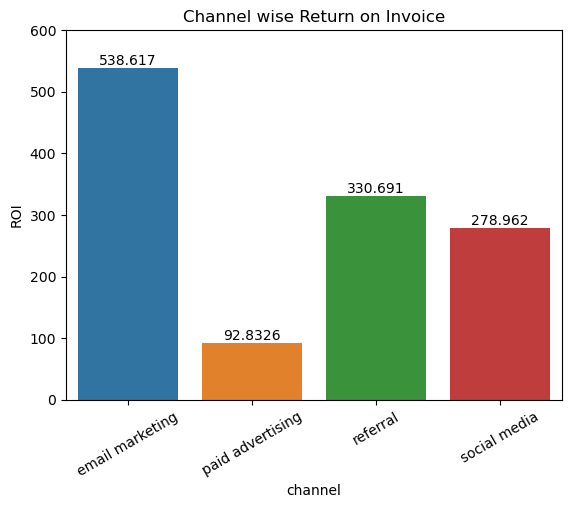

In [71]:
## Now we will create summary report for ROI wrt different channel and plotting that summary

channel_roi_summ = df.groupby('channel', as_index=False)['ROI'].mean()
fig = sns.barplot(data=channel_roi_summ, x = 'channel', y = 'ROI')
for i in fig.containers:
    plt.bar_label(i)
plt.title('Channel wise Return on Invoice')
plt.xticks(rotation = 30)
plt.ylim((0,600))
plt.show()

* **we can clearly see email marketing is having max ROI among all the different channel followed by Referral.**
* **Paid advertisement is having least ROI among all channel**

### Now let’s calculate the customer lifetime value (CLTV) from each channel.

Formula --> CLTV = (revenue – cost) * conversion_rate / cost

In [67]:
df['CLTV'] = ((df['revenue'] - df['cost'])*df['conversion_rate'])/df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,ROI,CLTV
0,1,referral,8.320327,0.123145,4199,504.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,111.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,603.095925,26.385185
3,4,social media,9.546326,0.167592,1520,159.223564,26.517043
4,5,referral,8.320327,0.123145,2419,290.733775,35.679260


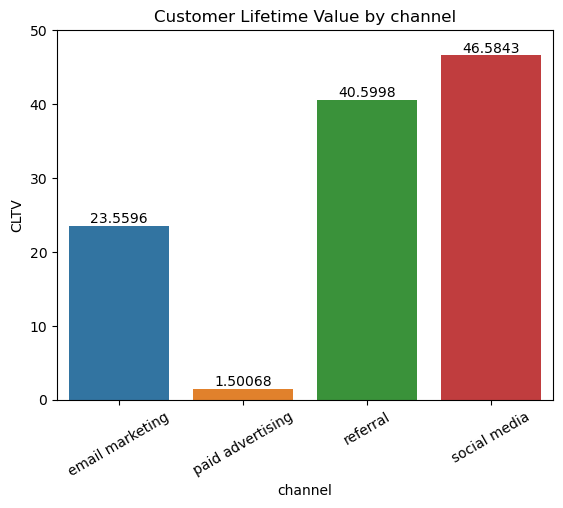

In [70]:
## Now we will create summary report for CLTV wrt different channel and plotting that summary

channel_cltv_summ = df.groupby('channel', as_index=False)['CLTV'].mean()
fig = sns.barplot(data=channel_cltv_summ, x = 'channel', y = 'CLTV')
for i in fig.containers:
    plt.bar_label(i)
plt.title('Customer Lifetime Value by channel')
plt.xticks(rotation = 30)
plt.ylim((0,50))
plt.show()